In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from skimage import img_as_float
import mnist
import numpy as np


from models import ConvNet

# tr_data = MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
# te_data = MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# train_data = torch.utils.data.DataLoader(dataset=tr_data, batch_size=64, shuffle=True)
# test_data = torch.utils.data.DataLoader(dataset=te_data, batch_size=64, shuffle=True)

In [2]:
X_train = np.array([img_as_float(image) for image in mnist.train_images()])
X_test  = np.array([img_as_float(image) for image in mnist.test_images()])

y_train, y_test = mnist.train_labels(), mnist.test_labels()
np.random.shuffle(y_train)
np.random.shuffle(y_test)

In [3]:
tensor_x = torch.FloatTensor(X_train) # transform to torch tensors
tensor_y = torch.LongTensor(y_train)

tr_dataset = TensorDataset(tensor_x.unsqueeze(1),tensor_y) # create your datset
train_data = DataLoader(tr_dataset, batch_size=64, shuffle=True)

tensor_x = torch.FloatTensor(X_test) # transform to torch tensors
tensor_y = torch.LongTensor(y_test)

test_dataset = TensorDataset(tensor_x.unsqueeze(1),tensor_y) # create your datset
test_data = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [5]:
import torch
from torch import nn as nn
from torch.autograd import Variable

import numpy as np

from IPython import display
from copy import deepcopy
import random

np.random.seed(123)
torch.manual_seed(63143)
random.seed(123)
torch.cuda.manual_seed_all(5123)


train_loss, val_acc, train_acc = list(), list(), list()

network = ConvNet()
params = [param for param in network.parameters() if param.requires_grad]
optimizer = torch.optim.Adam(params)
criterion = nn.CrossEntropyLoss()
epoch = 0

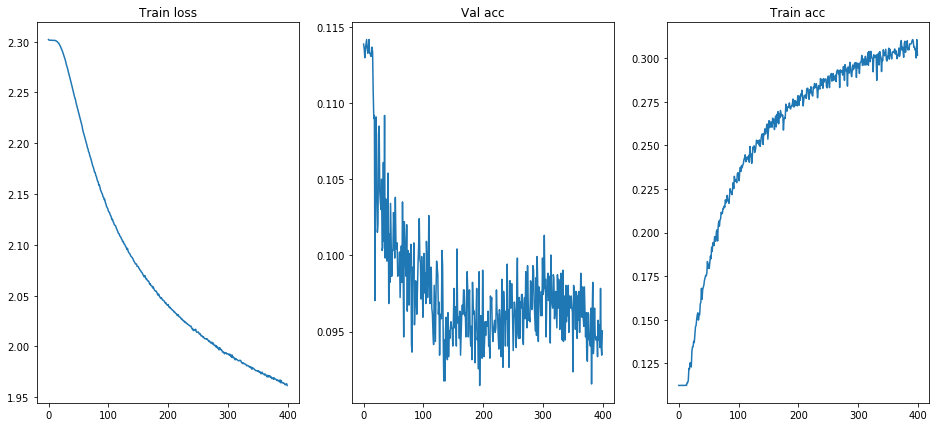

Loss: 1.9616065096499316


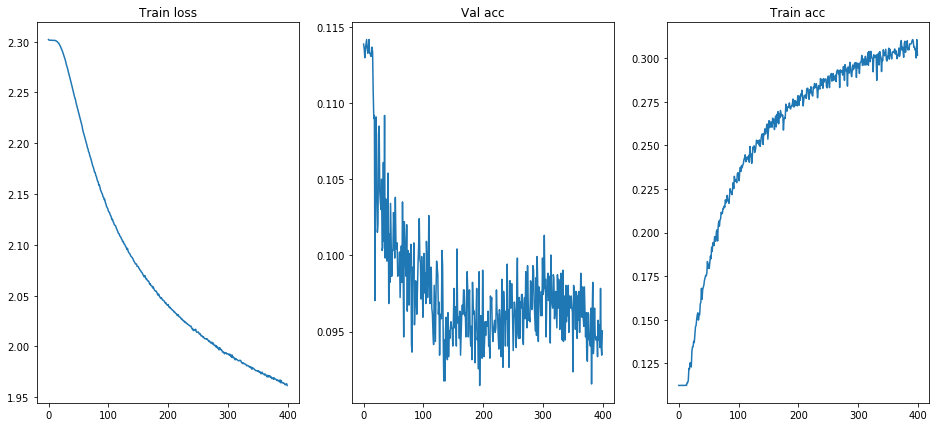

In [9]:


while True:
    print("Epoch", epoch)
    network.train(True)
    
    epoch_loss = []
    
    for X_batch, y_batch in train_data:
        pred = network(Variable(X_batch))
        target = Variable(y_batch)

        loss = criterion(pred, target)

        # train on batch
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        try:
            epoch_loss.append(loss.data.item())
        except:
            epoch_loss.append(loss.data.numpy()[0])

    train_loss.append(np.mean(epoch_loss))
            
    if not test_data is None:
        network.train(False)
        th=0
        b_score = list()
        #print('Validating')
        for X_batch_, y_batch_ in test_data:
            pred_ = network(Variable(X_batch_))
            target_ = pred_.max(1)[1].data.numpy()
            y_pred = y_batch_.numpy()
            b_score.append((target_ == y_pred).mean())
            th+=1
            if th>np.inf:
                break
        score = np.mean(b_score)
        val_acc.append(score)

        th=0
        b_score = list()
        for X_batch_, y_batch_ in train_data:
            pred_ = network(Variable(X_batch_))
            target_ = pred_.max(1)[1].data.numpy()
            y_pred = y_batch_.numpy()
            b_score.append((target_ == y_pred).mean())
            th+=1
            if th>np.inf:
                break
        score = np.mean(b_score)
        train_acc.append(score)
        
        plt.clf()

        fig, ax = plt.subplots(1,3,figsize=(16,7))

        ax[0].plot(train_loss)
        ax[0].set_title('Train loss')

        ax[1].plot(val_acc)
        ax[1].set_title('Val acc')
        
        ax[2].plot(train_acc)
        ax[2].set_title('Train acc')
        
        display.clear_output(wait=True)
        display.display(plt.gcf())

        print("Loss: {}".format(train_loss[-1]))
        
        epoch += 1

In [10]:
import pickle

with open("shuf0.pickle", 'wb') as f:
    pickle.dump(network, f)